In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

ModuleNotFoundError: No module named 'pandas'

# METADATA
* ATP:Tournament number
* Location:Venue of tournament
* Tournament:Name of tournament
* Date:Date of match
* Series:Name of ATP tennis series
* Court:Type of court
* Surface:Type of surface
* Round:Round of match
* Best of: Maximum number of sets playable in match
* Winner: Match winner
* Loser: Match loser
* WRank: ATP Entry ranking of the match winner as of the start of the tournament
* LRank: ATP Entry ranking of the match loser as of the start of the tournament
* WPts:  ATP Entry points of the match winner as of the start of the tournament
* LPts:  ATP Entry points of the match loser as of the start of the tournament
* W1: Number of games won in 1st set by match winner
* L1: Number of games won in 1st set by match loser
* W2: Number of games won in 2nd set by match winner
* L2: Number of games won in 2nd set by match loser
* W3: Number of games won in 3rd set by match winner
* L3: Number of games won in 3rd set by match loser
* W4: Number of games won in 4th set by match winner
* L4: Number of games won in 4th set by match loser
* W5: Number of games won in 5th set by match winner
* L5: Number of games won in 5th set by match loser
* Wsets: Number of sets won by match winner
* Lsets: Number of sets won by match loser
* Comment: Comment on the match (Completed, won through retirement of loser, or via Walkover)
* B365W: Bet365 odds of match winner
* B365L: Bet365 odds of match loser
* PSW: Bet&Win odds of match winner
* PSL: Bet&Win odds of match loser
* MaxW: Maximum odds of match winner
* MaxL: Maximum odds of match loser
* AvgW: Average odds of match winner
* AvgL: Average odds of match loser
* EXW: Expekt odds of match winner
* EXL: Expekt odds of match loser
* LBW: Ladbrokes odds of match winner
* LBL: Ladbrokes odds of match loser
* SJW: Stan James odds of match winner
* SJL: Stan James odds of match loser
* UBW: Unibet odds of match winner
* UBL: Unibet odds of match loser
* pl1_hand:Winners Nationality
* pl1_year_pro: Winners starting year as a pro
* pl1_weight: Winners weight
* pl1_height: Winners height
* pl1_hand: Winners playing hand
* pl2_flag: Losers Nationality
* pl2_year_pro: Losers starting year as a pro
* pl2_weight: Winners weight
* pl2_height: Losers height
* pl2_hand: Losers playing hand

In [2]:
tenis_data=pd.read_csv("tennis_data.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# DATA CLEANING

In [3]:
tenis_data['Date']=pd.to_datetime(tenis_data['Date'])
print('Date range is '+str(tenis_data['Date'].min())+'  '+str(tenis_data['Date'].max()))

Date range is 2007-12-31 00:00:00  2022-02-20 00:00:00


In [4]:
#Let's check all tournaments played in a normal year
tenis_data['Tournament'][(tenis_data['Date']>='2019-01-01') & (tenis_data['Date']<='2019-12-31')].unique()

array(['Brisbane International', 'Qatar Exxon Mobil Open',
       'Maharashtra Open', 'ASB Classic', 'Sydney International',
       'Australian Open', 'Cordoba Open', 'Open Sud de France',
       'Sofia Open', 'Argentina Open', 'New York Open',
       'ABN AMRO World Tennis Tournament', 'Delray Beach Open', 'Open 13',
       'Rio Open', 'Abierto Mexicano', 'Dubai Tennis Championships',
       'Brasil Open', 'BNP Paribas Open', 'Sony Ericsson Open',
       "U.S. Men's Clay Court Championships", 'Grand Prix Hassan II',
       'Monte Carlo Masters', 'Open Banco Sabadell ', 'Hungarian Open',
       'Millennium Estoril Open', 'BMW Open', 'Mutua Madrid Open',
       "Internazionali BNL d'Italia", 'Geneva Open', 'Lyon Open',
       'French Open', 'Rosmalen Grass Court Championships',
       'Mercedes Cup', 'Halle Open', "Queen's Club Championships",
       'Antalya Open', 'Eastbourne International', 'Wimbledon',
       'SkiStar Swedish Open', 'Hall of Fame Championships',
       'Croatia Open

## Number of Tournaments per Series and total rounds

In [5]:
all_tournaments=tenis_data[['Tournament','Series']].drop_duplicates(subset=['Tournament','Series'])
all_tournaments.groupby('Series').agg({'Tournament':'count'})#count().sort_values( by='Tournament'

,Tournament
Series,
ATP250,120
ATP500,27
Grand Slam,4
International,41
International Gold,10
Masters,9
Masters 1000,12
Masters Cup,1


## All winners per tournament in the dataset history

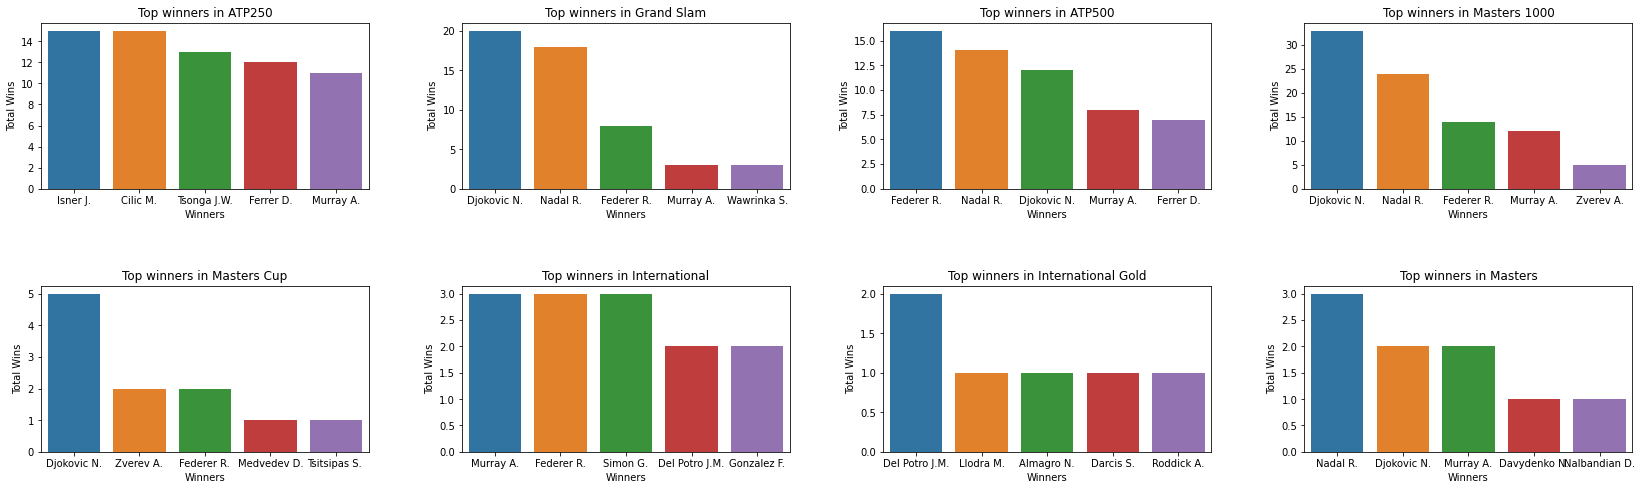

In [6]:
all_series=list(tenis_data['Series'].unique())
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(24,8))
i=0
j=0
for serie in all_series:
    all_winners=tenis_data['Winner'][ (tenis_data['Series']==serie)   &   (tenis_data['Round']=='The Final')]
    winners=pd.DataFrame(all_winners.value_counts().reset_index())
    winners.rename(columns={'index':'Name','Winner':'Total Wins'}, inplace=True)
    winners=winners.sort_values(by='Total Wins', ascending=False).head(5)
    if j==4:
        i=1
        j=0
    sns.barplot( ax=ax[i,j] ,x=winners["Name"], y=winners["Total Wins"], data=winners.dropna())
    ax[i,j].set_title('Top winners in ' +serie)
    ax[i,j].set_xlabel('Winners')
    fig.tight_layout(pad=5)
    j+=1
plt.show()

## Nadal vs Djokovic.... who is the best?
We know that Grand slams are the hardest and greates tournaments, which are usually win by the best players in the world, so let's compare the top biggest Grand Slam winners

### Rank

In [7]:
djokovic=tenis_data[['Date','Winner','Loser','WRank','LRank','Tournament']][( tenis_data['Winner']=='Djokovic N.') | (tenis_data['Loser']=='Djokovic N.')]
nadal=tenis_data[['Date','Winner','Loser','WRank','LRank','Tournament']][( tenis_data['Winner']=='Nadal R.') | (tenis_data['Loser']=='Nadal R.')]
def rank_mapping(data,tenis_player):
    if data['Winner']==tenis_player:
        return data['WRank']
    else:
        return data['LRank']
djokovic['Rank']=djokovic.apply(lambda x: rank_mapping(x,'Djokovic N.'), axis=1)
djokovic=djokovic.drop_duplicates(subset='Tournament')
nadal['Rank']=nadal.apply(lambda x: rank_mapping(x,'Nadal R.'), axis=1)

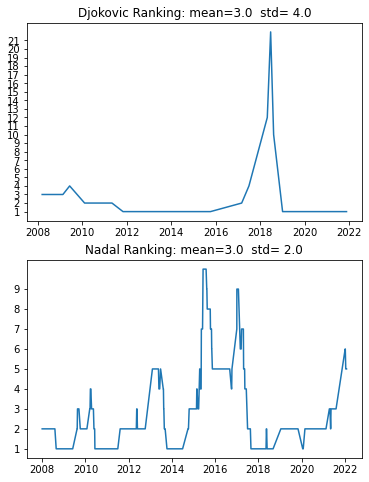

In [8]:
import numpy as np
fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(6,8))
sort_djo=djokovic[['Rank','Date']].sort_values(by='Date')
sort_nad=nadal[['Rank','Date']].sort_values(by='Date')
ax[0].plot(sort_djo['Date'],sort_djo['Rank'])
ax[0].set_yticks(np.arange(djokovic['Rank'].min(), djokovic['Rank'].max(), 1.0))
mean,std=norm.fit(sort_djo['Rank'].dropna())
ax[0].set_title('Djokovic Ranking: '+'mean='+str(round(mean,0))+ '  std= '+str(round(std,0)))

ax[1].plot(sort_nad['Date'],sort_nad['Rank'])
ax[1].set_yticks(np.arange(nadal['Rank'].min(), nadal['Rank'].max(), 1.0))
mean,std=norm.fit(sort_nad['Rank'].dropna())
ax[1].set_title('Nadal Ranking: '+'mean='+str(round(mean,0))+ '  std= '+str(round(std,0)))

plt.show()

In [9]:
def find_consecutives(date_col,search_col,data,pattern):
    sort_data=data[[date_col,search_col]].sort_values(by=date_col)
    items=[int(x) for x in data[search_col].to_list()]
    ocurrencies=0
    all_ocurrencies=[]
    for i in range(len(items)):
        if items[i]==pattern:
            if ocurrencies==0:
                first_ocurrencie=i
            ocurrencies+=1
            try:
                if items[i+1]==1:
                    continue
                else:
                    all_ocurrencies.append(ocurrencies,(data[date_col][first_ocurrencie:first_ocurrencie+1,].values[0],data[date_col][i:i+1,].values[0]  ))
                    print(first_ocurrencie,i)
            except:
                all_ocurrencies.append( [ocurrencies,(data[date_col][first_ocurrencie:first_ocurrencie+1,].values[0],data[date_col][i:i+1,].values[0]  )] )
                ocurrencies=0
    number_of_days=[ int((all_ocurrencies[i][1][1]-all_ocurrencies[i][1][0] )/(1000000000*60*60*24))  for i in range(len(all_ocurrencies))]
    return max(number_of_days)
            
    
print('Number of consecutive days as number 1 for Djokovic: '+str(find_consecutives('Date','Rank',sort_djo,1)))
print('Number of consecutive days as number 1 for Nadal: '+str(find_consecutives('Date','Rank',sort_nad,1)))

Number of consecutive days as number 1 for Djokovic: 1435
Number of consecutive days as number 1 for Nadal: 388


Text(0.5, 1.0, 'Total Wins:Nadal=20 Djokovic=27')

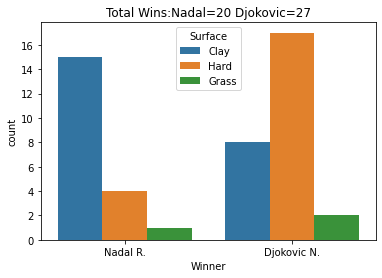

In [10]:
tenis_data_comparison=tenis_data[ ((tenis_data['Winner']=='Djokovic N.') & (tenis_data['Loser']=='Nadal R.')) |( (tenis_data['Winner']=='Nadal R.')  &  (tenis_data['Loser']=='Djokovic N.'))]
sns.countplot(x='Winner',hue='Surface',data=tenis_data_comparison)
plt.title('Total Wins:Nadal='+str(tenis_data_comparison['Winner'].value_counts()[1])+ ' Djokovic='+str(tenis_data_comparison['Winner'].value_counts()[0]) )

So between Djokovic and Nadal we can conclude:

1) Djokovic has won more matches against Nadal.

2) Djokovic has kept rank #1 many more days than Nadal.

3) Nadal ranking has less standard deviation than Djokovic, indicating that his performance does not vary much, even at top #5, this would not be the case if Djokovic would have fallen to #22.

4) Depending on the surface, on or another may have the advantage.


**Note**: Data has only the entry rank to tournaments, there are slight variations when compared with real rankings.

In [11]:
#Another way to analyze the rivality against this two is considering people's opinion, so let's analyze bet information
#We will just analyze bet365 which is the most popular among the ones available

#But before that, this is what i found about bet365 odss, lets say that odds is $10 this means that, per each dolar you spend you will win $10, retuning $11 dollars
#This means that players that are more likely to win would have lower odds.

bets=tenis_data[['Date','Winner','Loser','WRank','LRank','Tournament','B365W','B365L']][ ((tenis_data['Winner']=='.') & (tenis_data['Loser']=='Nadal R.')) |( (tenis_data['Winner']=='Nadal R.')  &  (tenis_data['Loser']=='Djokovic N.'))]
bets['Year']=tenis_data['Date'].dt.year
def rank_mapping(data,tenis_player):
    if data['Winner']==tenis_player:
        return data['B365W']
    else:
        return data['B365L']
    
bets['bets_nad']=bets.apply(lambda x: rank_mapping(x,'Nadal R.'), axis=1)
bets['bets_djo']=bets.apply(lambda x: rank_mapping(x,'Djokovic N.'), axis=1)                                                                                           

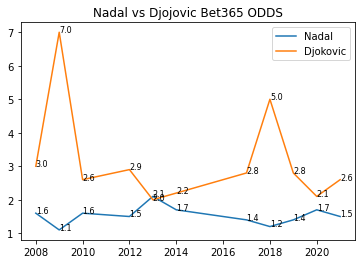

In [12]:
avg_bets=bets[['Year','bets_nad','bets_djo']].groupby('Year').mean().reset_index()
avg_bets['bets_nad']=avg_bets['bets_nad'].apply(lambda x: round(x,1))
avg_bets['bets_djo']=avg_bets['bets_djo'].apply(lambda x: round(x,1))
plt.plot(avg_bets['Year'],avg_bets['bets_nad'],label='Nadal')
plt.plot(avg_bets['Year'],avg_bets['bets_djo'],label='Djokovic')
plt.title('Nadal vs Djojovic Bet365 ODDS')
Years=avg_bets['Year'].unique().tolist()
i=0
for dot1,dot2 in zip(avg_bets['bets_nad'],avg_bets['bets_djo']):
    plt.text(Years[i],dot1,dot1,fontdict={'fontsize': 8, 'fontweight': 'medium'})
    plt.text(Years[i],dot2,dot2,fontdict={'fontsize': 8, 'fontweight': 'medium'})
    i+=1
plt.legend()


* From 2008 to 2014 Djokovic bet was paying more money per each dolar spent, this means that statistically was more likely that Nadal wins, same ocurrs during 2017

* During 2015 to end of 2016 Nadal was paying more money per dollar spent, this is not a coincidence, because during that period Nadal was not within the top 5 in the rank.